In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation,Conv2D,MaxPool2D,Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from matplotlib import pyplot
import numpy as np

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
trainX = np.expand_dims(trainX, axis=-1)
trainX = trainX.astype("float32") / 255.0

trainy=to_categorical(trainy)


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#without batch normalization
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1)))
model_1.add(MaxPool2D(2,2))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
opt1 = SGD(lr=0.001)
model_1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])
# fit model
history1 = model_1.fit(trainX, trainy, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4788 - accuracy: 0.6135
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3952 - accuracy: 0.8862
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3126 - accuracy: 0.9077
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2765 - accuracy: 0.9178
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2516 - accuracy: 0.9255
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2313 - accuracy: 0.9314
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2142 - accuracy: 0.9365
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1999 - accuracy: 0.9408
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1873 - accuracy: 0.9449
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.176

In [6]:
#using Batch Normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#fit model
history = model.fit(trainX, trainy, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1544 - accuracy: 0.9554
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9821
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9871
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9918
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9935
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9955
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0140 - accuracy: 0.9961
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

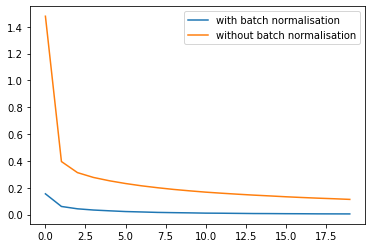

In [7]:
pyplot.plot(history.history['loss'], label='with batch normalisation')
pyplot.plot(history1.history['loss'], label='without batch normalisation')
pyplot.legend()
pyplot.show()